In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('credit card dataset.xlsx')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

# cleaning

In [4]:
credit_card_clean = df.copy()

In [5]:
# Drop unnecessary, row-specific columns ('id') from the DataFrame
credit_card_clean.drop('id', axis=1, inplace=True)

# Convert the 'Class' features to string type. This will be useful for downstream processes.
credit_card_clean['Class'] = credit_card_clean['Class'].astype(str)

In [6]:
# List containing the target variable name
target_name = ['Class']

# List comprehension to extract feature names from columns excluding the target variable
feature_names = [
    name
    for name in credit_card_clean.columns
    if name not in target_name
]

# missing data check

In [7]:
# Count the total number of missing values in the DataFrame
total_missing_values = credit_card_clean.isna().sum().sum()

# Print the total number of missing values
print(f'Total number of missing values = {total_missing_values}')

Total number of missing values = 0


In [8]:
# Inspect rows that are duplicated based on all features
with pd.option_context('display.max_columns', 40):
    display(credit_card_clean[credit_card_clean.duplicated(subset=feature_names, keep=False)])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
323127,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,0.990274,-0.70778,-1.891977,-1.183117,-0.287687,-1.230971,-0.722383,-0.99063,-0.169996,-4.118596,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,0.990274,-0.70778,-1.891977,-1.183117,-0.287687,-1.230971,-0.722383,-0.99063,-0.169996,-4.118596,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1


In [9]:
# Drop duplicates observations except for the first occurrence
credit_card_clean.drop_duplicates(subset=feature_names, inplace=True)

In [10]:
kartu_kredit = credit_card_clean
kartu_kredit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [11]:
kartu_kredit.shape

(568629, 30)

In [12]:
kartu_kredit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,...,568629.000000,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,5.686290e+05,568629.000000,568629.000000,568629.000000
mean,0.000003,-0.000005,0.000002,-8.855104e-07,0.000002,-0.000006,0.000004,0.000011,-4.807863e-07,0.000001,...,0.000007,-0.000014,0.000011,-0.000011,0.000002,-6.153061e-07,4.225269e-07,-0.000003,-0.000004,12041.939156
std,0.999999,0.999996,1.000000,1.000002e+00,1.000001,0.999993,0.999997,0.999970,1.000002e+00,1.000001,...,0.999987,0.999944,0.999965,0.999966,1.000001,1.000002e+00,1.000002e+00,1.000000,0.999998,6919.636504
min,-3.495584,-49.966572,-3.183760,-4.951222e+00,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919e+00,-3.163276,...,-78.147839,-19.382523,-7.734798,-30.295450,-4.067968,-1.361263e+01,-8.226969e+00,-10.498633,-39.035243,50.010000
25%,-0.565285,-0.486680,-0.649298,-6.560208e-01,-0.293495,-0.445872,-0.283533,-0.192257,-5.687501e-01,-0.590101,...,-0.350239,-0.166441,-0.490486,-0.237629,-0.651580,-5.541491e-01,-6.318949e-01,-0.304961,-0.231878,6054.860000
50%,-0.093636,-0.135894,0.000354,-7.376398e-02,0.081089,0.078716,0.233367,-0.114523,9.252585e-02,0.262617,...,-0.123376,-0.037431,-0.027327,-0.059689,0.015903,-8.193948e-03,-1.189070e-02,-0.172911,-0.013930,12030.130000
75%,0.832658,0.343553,0.628539,7.070060e-01,0.439738,0.497788,0.525955,0.047299,5.592661e-01,0.592462,...,0.248217,0.147976,0.463887,0.155715,0.700740,5.500149e-01,6.728885e-01,0.334021,0.409589,18036.330000
max,2.229046,4.361865,14.125834,3.201536e+00,42.716891,26.168402,217.873038,5.958040,2.027006e+01,31.722709,...,29.872812,8.087080,12.632511,31.707627,12.965639,1.462151e+01,5.623285e+00,113.231093,77.255937,24039.930000


In [13]:
kartu_kredit.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.561181,0.484497,-0.498963,0.517461,0.354741,0.573378,-0.226783,0.548975,0.599107,...,-0.219180,-0.034647,-0.073751,-0.068900,-0.014654,-0.008507,0.009280,-0.122768,0.070117,-0.001276
V2,-0.561181,1.000000,-0.627810,0.579639,-0.631669,-0.341060,-0.694018,0.191356,-0.585100,-0.621799,...,0.263731,-0.013607,0.035377,0.151884,-0.027511,0.132443,0.012220,0.053828,0.021062,-0.000083
V3,0.484497,-0.627810,1.000000,-0.687726,0.510350,0.508986,0.634335,-0.263040,0.648616,0.707676,...,-0.253817,-0.021694,-0.041985,-0.058873,0.076458,-0.076331,-0.052056,-0.190579,0.005351,-0.001998
V4,-0.498963,0.579639,-0.687726,1.000000,-0.429242,-0.474411,-0.588649,0.199024,-0.676649,-0.712839,...,0.257244,-0.013101,0.091206,0.043262,-0.102508,0.029402,0.136679,0.188035,-0.011318,0.001858
V5,0.517461,-0.631669,0.510350,-0.429242,1.000000,0.245194,0.586828,-0.314996,0.479615,0.563874,...,-0.246705,0.034162,-0.119167,-0.113912,-0.083244,-0.047845,0.047771,-0.043756,0.108426,-0.000013
V6,0.354741,-0.341060,0.508986,-0.474411,0.245194,1.000000,0.418722,-0.604482,0.432243,0.471008,...,-0.188341,-0.040202,0.036935,0.308576,-0.005231,-0.195344,-0.067605,-0.260795,-0.065655,0.000725
V7,0.573378,-0.694018,0.634335,-0.588649,0.586828,0.418722,1.000000,-0.181017,0.601793,0.678005,...,-0.299459,0.019662,-0.104074,-0.111155,-0.004156,0.000804,-0.006489,-0.036551,0.040741,0.001332
V8,-0.226783,0.191356,-0.263040,0.199024,-0.314996,-0.604482,-0.181017,1.000000,-0.208560,-0.200009,...,0.131317,0.056506,-0.098827,-0.463612,0.083263,0.322654,0.040447,0.298425,0.046042,-0.000192
V9,0.548975,-0.585100,0.648616,-0.676649,0.479615,0.432243,0.601793,-0.208560,1.000000,0.748487,...,-0.328978,0.131005,-0.204728,-0.042376,0.044007,-0.034885,-0.131000,-0.111843,0.069958,-0.001589
V10,0.599107,-0.621799,0.707676,-0.712839,0.563874,0.471008,0.678005,-0.200009,0.748487,1.000000,...,-0.287061,0.037438,-0.150970,-0.056279,0.045934,-0.014045,-0.053684,-0.134905,0.035649,-0.001258


<AxesSubplot:>

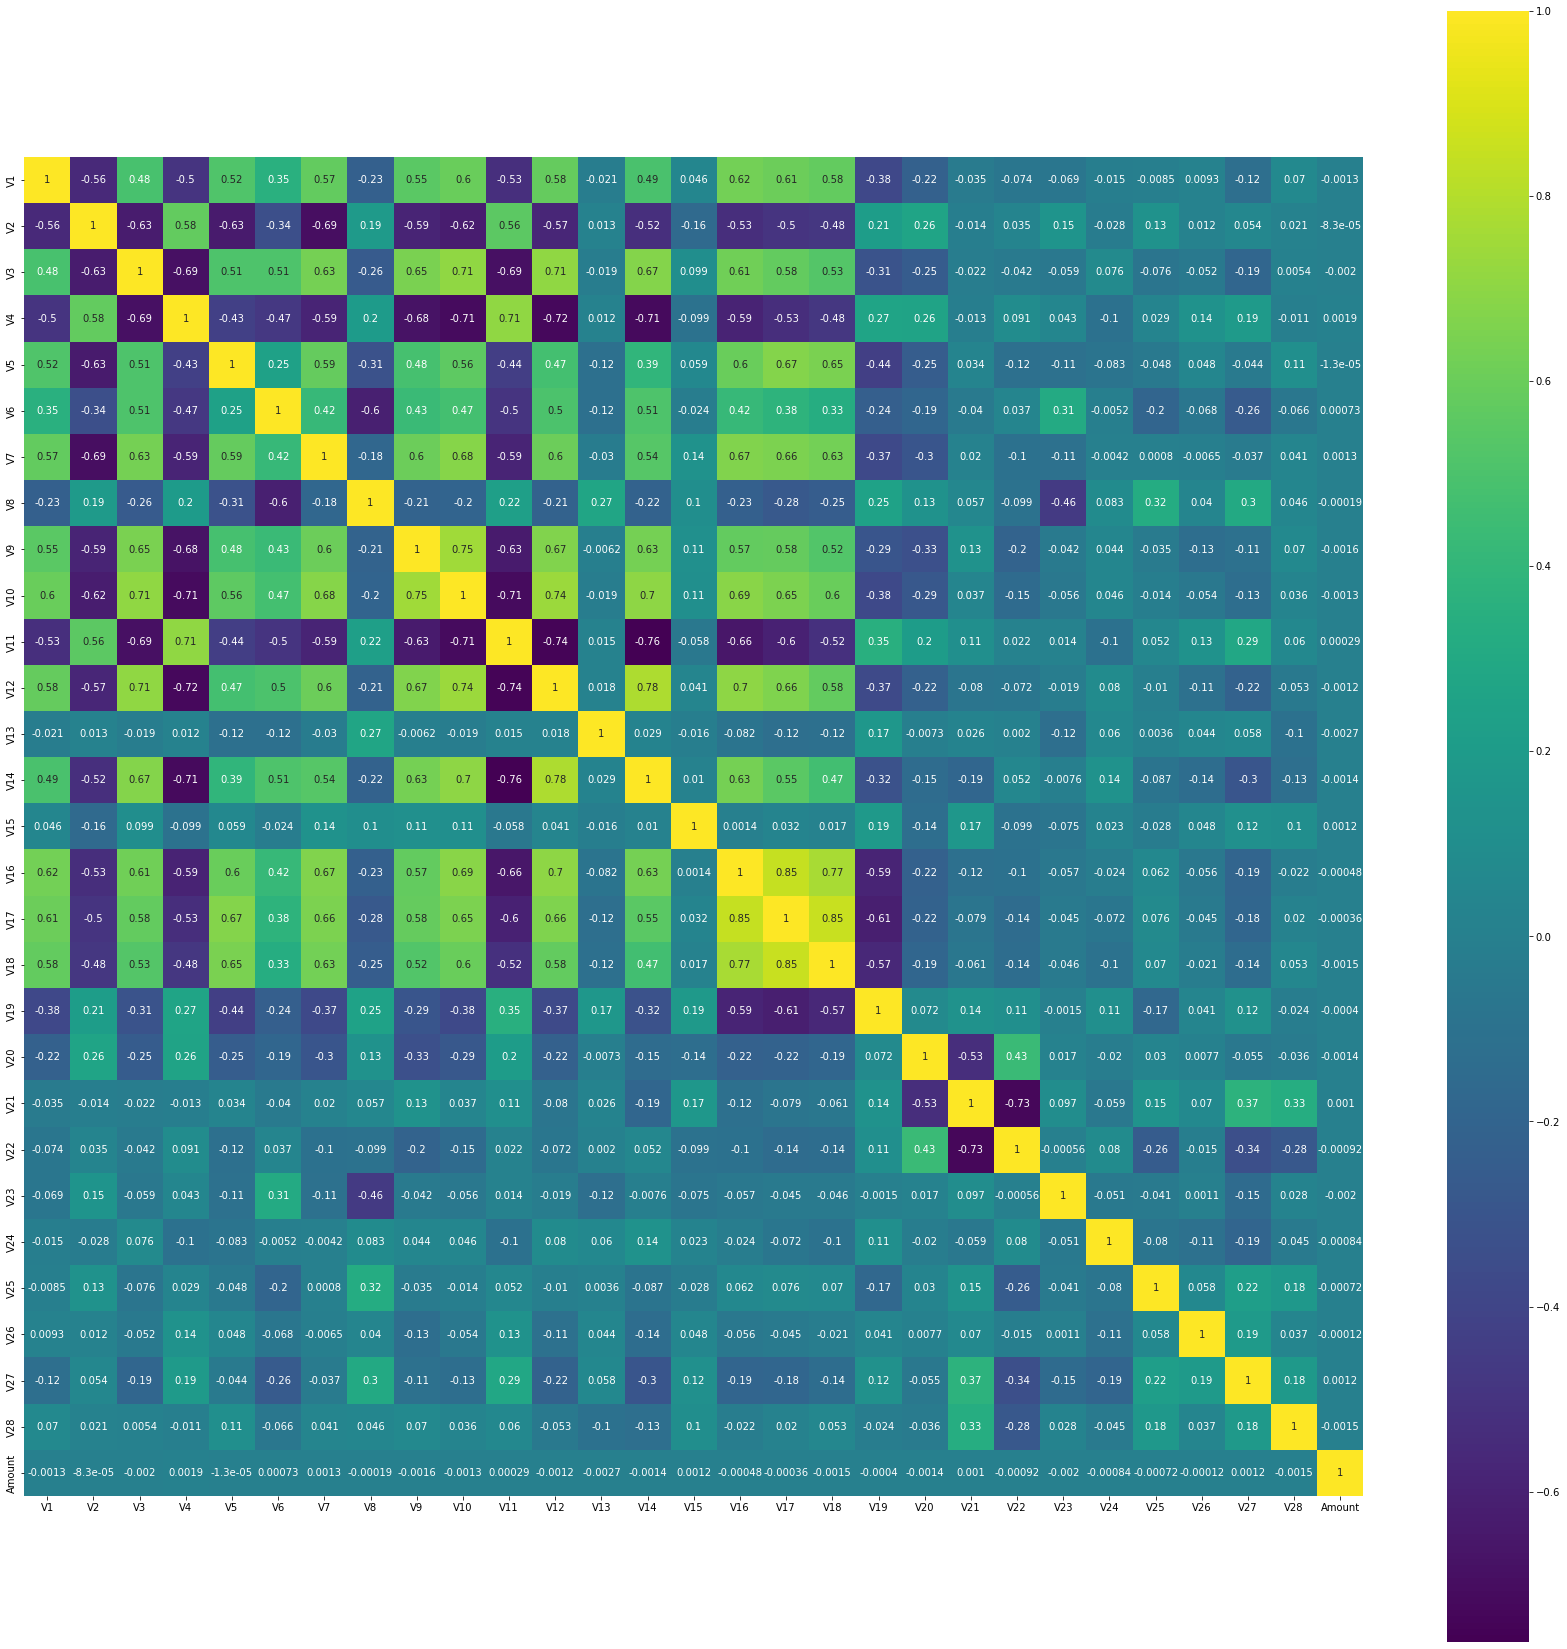

In [14]:
corelasi = kartu_kredit.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corelasi,vmax=1,square=True,annot=True, cmap='viridis')

# PCA

In [19]:
pca = PCA().fit(kartu_kredit)

Text(0, 0.5, 'Explained Ratio Cumulative')

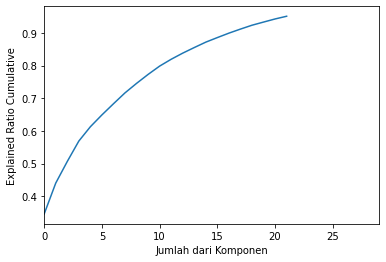

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,29,1)
plt.xlabel('Jumlah dari Komponen')
plt.ylabel('Explained Ratio Cumulative')

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standarisasi data (diperlukan sebelum PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kartu_kredit)

# Melakukan PCA dengan batasan varians sebesar 95%
pca = PCA(n_components=0.95)  # Menentukan batas varians sebesar 95%
X_pca = pca.fit_transform(X_scaled)

# Jumlah komponen utama yang dipilih
num_components = pca.n_components_  
print(f"Jumlah komponen utama yang dipilih: {num_components}")

# Varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
print("Varians yang dijelaskan oleh setiap komponen utama:")
print(explained_variance_ratio)

# Kumulatif varians yang dijelaskan
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Kumulatif Varians yang dijelaskan:")
print(cumulative_explained_variance)


Jumlah komponen utama yang dipilih: 22
Varians yang dijelaskan oleh setiap komponen utama:
[0.34614897 0.09430589 0.06621467 0.06238949 0.04383582 0.03616305
 0.03412132 0.03332944 0.02900889 0.02740951 0.02548438 0.02090801
 0.01874092 0.01708422 0.01658009 0.01393649 0.01355829 0.01240736
 0.01181894 0.00963581 0.00951242 0.00830708]
Kumulatif Varians yang dijelaskan:
[0.34614897 0.44045486 0.50666952 0.56905902 0.61289484 0.64905788
 0.68317921 0.71650864 0.74551753 0.77292704 0.79841142 0.81931943
 0.83806035 0.85514457 0.87172466 0.88566115 0.89921944 0.9116268
 0.92344574 0.93308155 0.94259397 0.95090105]


In [49]:
X_scaled

array([[-0.26065124, -0.46964626,  2.49626496, ..., -0.15104218,
         0.85845059, -0.99999824],
       [ 0.98509839, -0.35604232,  0.55805445, ..., -0.06450834,
        -0.79636755, -0.99999824],
       [-0.26027505, -0.94938484,  1.72853634, ..., -0.24471522,
        -1.37700984, -0.99999824],
       ...,
       [-0.31200091, -0.00409024,  0.13752352, ..., -0.26873834,
         1.66640559,  1.00000176],
       [ 0.63686861, -0.51696756, -0.30089077, ..., -0.07624703,
        -0.2718511 ,  1.00000176],
       [-0.7951485 ,  0.43324285, -0.64914243, ...,  0.7229426 ,
         1.36596614,  1.00000176]])

In [37]:
pca.get_covariance()

array([[ 1.00016607e+00, -5.62943918e-01,  4.85362363e-01,
        -5.00158552e-01,  5.15621309e-01,  3.53472099e-01,
         5.72067481e-01, -2.27593908e-01,  5.49936878e-01,
         5.95762498e-01, -5.26657363e-01,  5.82555437e-01,
        -2.03877541e-02,  4.97454684e-01,  4.60234819e-02,
         6.21839220e-01,  6.06067328e-01,  5.77653298e-01,
        -3.77771488e-01, -2.19905404e-01, -3.62157821e-02,
        -7.48691102e-02, -6.86541487e-02, -1.46506294e-02,
        -8.55622259e-03,  1.00217618e-02, -1.22042786e-01,
         7.05718202e-02, -1.27444172e-03, -5.01160306e-01],
       [-5.62943918e-01,  9.90279738e-01, -6.27958172e-01,
         5.77324477e-01, -6.35865210e-01, -3.39640714e-01,
        -7.04105734e-01,  1.93236910e-01, -5.79114388e-01,
        -6.33783533e-01,  5.55235685e-01, -5.68840868e-01,
         1.31152830e-02, -5.21580027e-01, -1.60885474e-01,
        -5.27034180e-01, -5.02511287e-01, -4.76502113e-01,
         2.06971020e-01,  2.61773030e-01, -1.55282816e-

In [38]:
pca.explained_variance_ratio_

array([0.34614897, 0.09430589, 0.06621467, 0.06238949, 0.04383582,
       0.03616305, 0.03412132, 0.03332944, 0.02900889, 0.02740951,
       0.02548438, 0.02090801, 0.01874092, 0.01708422, 0.01658009,
       0.01393649, 0.01355829, 0.01240736, 0.01181894, 0.00963581,
       0.00951242, 0.00830708])

In [39]:
X_pca

array([[ 2.37311251, -0.21421979,  0.67873157, ..., -1.20998256,
        -1.06189866, -0.51901841],
       [ 2.26673235,  0.31137015,  0.29648458, ..., -0.41973821,
        -0.04560685,  0.97518494],
       [ 2.45631051, -0.53683723, -0.12907002, ..., -1.05378165,
        -0.10945927,  0.53192372],
       ...,
       [-0.92003623, -0.23313698, -0.50736197, ..., -0.26417008,
         0.15943758,  0.0147798 ],
       [ 1.06858151,  0.38139078, -0.3609055 , ...,  0.07699375,
         0.21374106, -0.28103698],
       [-2.26057124,  0.08747334, -0.20544712, ..., -0.06907699,
         0.40331177,  0.18306895]])

In [44]:
# Membuat DataFrame dari hasil PCA
pca_columns = [f'PC{i}' for i in range(1, pca.n_components_ + 1)] 
X_pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)

# Menambahkan kolom 'Class' kembali ke DataFrame hasil PCA
X_pca_df['Class'] = df['Class']
X_pca_df['Amount'] = df['Amount']
# Menampilkan DataFrame hasil PCA
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,Class,Amount
0,2.373113,-0.214220,0.678732,0.674117,0.539759,-0.905054,-1.214375,-0.959161,-0.764356,-1.105752,...,-0.267697,0.054202,-0.126505,-0.112461,-0.031642,-1.209983,-1.061899,-0.519018,0,17982.10
1,2.266732,0.311370,0.296485,-0.006398,-0.018388,0.842093,-0.363465,0.752437,-0.280746,-0.308909,...,0.347583,-0.402076,-0.165934,-0.412614,0.132036,-0.419738,-0.045607,0.975185,0,6531.37
2,2.456311,-0.536837,-0.129070,0.508969,1.030985,0.414285,-1.359521,1.254870,-1.503538,-1.155233,...,0.092971,-1.460929,-0.219716,0.726156,1.455226,-1.053782,-0.109459,0.531924,0,2513.54
3,2.850360,0.118715,-0.608946,-0.803276,-0.917525,1.234273,0.000699,0.925170,-1.457675,0.396079,...,-0.224498,-0.150317,0.356287,-0.547492,0.268042,-0.936469,0.349272,-0.273274,0,5384.44
4,2.247998,-0.438494,1.340430,0.428156,0.534104,1.218511,-0.754261,-0.386244,0.677275,0.651026,...,-0.250673,0.460986,0.088698,0.283345,-0.537881,-0.328191,-0.478347,-0.581790,0,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568624,-4.300693,1.361672,-0.829503,1.419311,1.125456,0.483601,-1.283186,0.975945,-1.496008,-0.308002,...,0.786187,-0.065934,1.420553,0.081279,-0.557270,-0.007839,-0.163189,-0.015841,1,10145.64
568625,-0.964903,0.453408,-0.261435,0.593902,1.322887,0.446608,-1.066512,1.014099,0.937130,0.445622,...,-0.047725,0.080425,-0.511901,0.939850,0.201660,0.352588,0.450057,0.083336,1,4394.16
568626,-0.920036,-0.233137,-0.507362,-0.074849,-0.069422,-0.737095,0.352829,-1.641958,-0.692732,-0.105415,...,0.035242,-0.147835,-0.435713,0.349395,0.083315,-0.264170,0.159438,0.014780,1,4653.40
568627,1.068582,0.381391,-0.360905,-0.720625,0.218520,-1.034671,0.519088,0.335474,-1.178950,0.154272,...,0.206602,0.422698,-0.501005,0.348795,0.072546,0.076994,0.213741,-0.281037,1,23572.85
